In [79]:
import numpy as np
import matplotlib.pyplot as plt

"""
The transpose() function from Numpy can be used to calculate the transpose of a matrix. The linalg.eig() method computes the eigenvalues of a squared array while diag() extracts a diagonal or construct a diagonal array.
"""
A = [[3, 1],[1, 1]] # [[3, 1],[1, 1]] would create a 2x2 matrix

A_eig = np.linalg.eig(A)
# Now the Jordan decomposition A = Gamma*Lambda*Gamma^T
E_val = A_eig[0]
Gamma = A_eig[1]
Lambda = np.diag(E_val)

# Check the result, you might get something within numerical eps
AA = np.dot( np.dot(Gamma, Lambda), np.transpose(Gamma) )
print( np.allclose(AA, A) )  # True

# Calculation of the square root of A
Lambda12 = np.sqrt(Lambda)
A12 = np.dot( np.dot(Gamma, Lambda12), np.transpose(Gamma) )

True


### **Box-Muller Method on 2-dim normal distribution**  

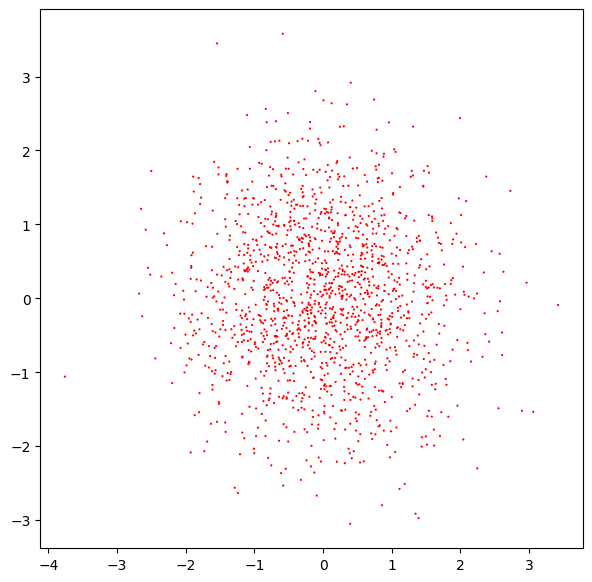

In [80]:
np.random.seed(100) 
# For mu = (0,0), covariance matrix Sigma = identity matrix
n = 1500  # Number of random numbers
msize = 2.5 # determines the size of the plotted points
# a good size might be msize=5 for n=500 pts and msize=0.1 for n>50K  
x = -np.log( np.random.uniform(low=0, high=1, size=n )) # creates an Exp(1) rv’s
a = np.sqrt( 2*x )
phi = np.random.uniform(low=0, high=2 * np.pi, size=n)
# Change to cartesian coordinates
x = a * np.cos(phi)
y = a * np.sin(phi)
# Create figure with transparent background
fig, ax = plt.subplots(figsize=(7, 7), facecolor='none')
ax.set_facecolor('none')  # transparent axes

plt.scatter(x, y,color = 'r', s=msize, edgecolors='none')

plt.savefig('2dimnormal.png', dpi = 300, transparent = True)

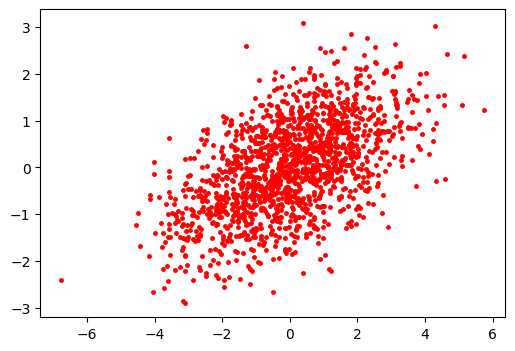

In [82]:
# Calculate sqrt(A) with Jordan decomposition
A = [[3, 1], [1, 1]]
A_eig = np.linalg.eig(A)
E_val = A_eig[0]
Gamma = A_eig[1]
Lambda = np.diag(E_val)
np.sqrt(Lambda)
Lambda12 = np.sqrt(Lambda)
A12 = np.dot(np.dot(Gamma, Lambda12), np.transpose(Gamma))

# Apply A^1/2 to points
c = np.vstack([x, y])  # shape 2 x n
tfxy = np.dot(A12, c)


# Plot transformed points
fig, ax = plt.subplots(figsize=(6, 4), facecolor='none')
ax.set_facecolor('none')  # transparent axes

ax.plot(tfxy[0], tfxy[1], 'ro', markersize=msize)


# Save fully transparent
fig.savefig('transformed_points.png', dpi=300, transparent=True, bbox_inches='tight', pad_inches=0)
